In [1]:
# Import packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm

In [2]:
HOTTEST_URL = "http://www.wx-now.com/Weather/WxExtremes?hottest=true"
COLDEST_URL = "http://www.wx-now.com/Weather/WxExtremes"

### Get HTML of hottest and coldest places

In [3]:
r_hot = requests.get(HOTTEST_URL)
r_cold = requests.get(COLDEST_URL)

### Parse using BeautifulSoup

In [4]:
soup_hot = BeautifulSoup(r_hot.text, "html.parser")
soup_cold = BeautifulSoup(r_cold.text, "html.parser")

In [5]:
today = str(pd.to_datetime("today").date())

### Parse the highest and lowest temperatures

In [6]:
t_hot = float(soup_hot.find_all("td", class_="Alert Number")[0].text.strip()[:-2])
t_cold = float(soup_cold.find_all("td", class_="Alert Number")[0].text.strip()[:-2])

In [7]:
print(f"Hottest Temperature in the World: {t_hot}˚F ({round((t_hot - 32) * 5 / 9, 1)}˚C)")
print(f"Coldest Temperature in the World: {t_cold}˚F ({round((t_cold - 32) * 5 / 9, 1)}˚C)")

Hottest Temperature in the World: 102.0˚F (38.9˚C)
Coldest Temperature in the World: -36.0˚F (-37.8˚C)


### Get Current Timestamp

In [8]:
today = pd.to_datetime("now").replace(second=0, microsecond=0)

### Load and Append to DataFrame

In [9]:
try:
    df = pd.read_csv("weather_extremes.csv")
    new_row = [today, t_hot, t_cold]
    df.loc[len(df)] = new_row
except Exception:
    # Create DataFrame on first run
    df = pd.DataFrame({"date": [today], "t_hot_f": [t_hot], "t_cold_f": [t_cold]})
    
# Save new CSV
df.to_csv("weather_extremes.csv", index=False)

### Dynamically Load Font `Lato`

In [10]:
font_path = "./fonts/Lato-Regular.ttf"

fm.fontManager.addfont(font_path)
fm.FontProperties(fname=font_path)

### Plot Data

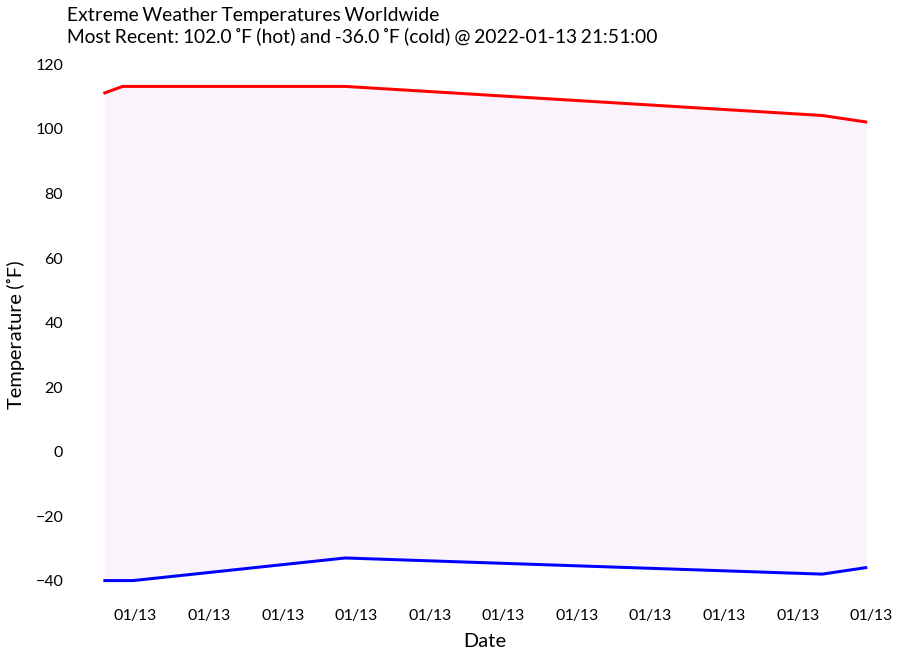

In [11]:
plt.rcParams["font.family"] = "Lato"
plt.rcParams["font.size"] = 16
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0

fig = plt.figure(figsize=(15, 10), facecolor="white")
ax = fig.add_subplot(111, frame_on=False)
#ax.grid(axis="y")
ax.set_axisbelow(True)

# Load DataFrame
df = pd.read_csv("weather_extremes.csv")

# Convert date column to datetime
df.date = df.date.apply(lambda t: pd.to_datetime(str(t)))

# Plot Data
ax.fill_between(df.date, df.t_hot_f, df.t_cold_f, color="#fbf0fb", alpha=0.8)
ax.plot(df.date, df.t_hot_f, linewidth=3, color="red")
ax.plot(df.date, df.t_cold_f, linewidth=3, color="blue")

# Tick Label Format
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))

# Axis Labels
ax.set_xlabel("Date", labelpad=10, size=20)
ax.set_ylabel("Temperature (˚F)", labelpad=10, size=20)

ax.set_title(
    "Extreme Weather Temperatures Worldwide\n" +
    f"Most Recent: {df.iloc[-1].t_hot_f} ˚F (hot) and {df.iloc[-1].t_cold_f} ˚F (cold) @ {df.iloc[-1].date}", 
    loc="left", pad=20
)

plt.savefig("weather_extremes.png", dpi=300, bbox_inches="tight")
plt.show()